In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'D:\\3term\\DANA 4830\\study_4830\\utils.py'>

In [3]:
df = pd.read_csv('data.csv').drop(columns = 'ID', axis=1)
df = df.dropna(axis=0, how='any')
X = df.drop(columns = 'class', axis =1 )
y = df['class']
df.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [4]:
int_columns, float_columns, object_columns, numerical_columns = utils.columns_df(X)

Shape: (174, 450)
Numerical features:  450
Categorical features:  0


In [5]:
X_v = pd.DataFrame()

In [6]:
for r in range(X.shape[0]):
    row = X.iloc[r,:]
    features = {}
    for i in range(25):
        task = 'task_' + str(i+1)
        i_vector = []
        lim_inf = i*18
        lim_sup = i*18+17
        features[task] = np.array(row[lim_inf:lim_sup+1])
    row_df = pd.DataFrame([features])
    X_v = pd.concat([X_v, row_df], ignore_index=True)

In [7]:
X_v.shape

(174, 25)

# PCA

In [57]:
X_pca_dict = {}

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
for i in range(25):
    mytask = 'task_' + str(i+1)
    task_i = X_v[mytask]
    task_i_df = pd.DataFrame(task_i.tolist(), index = task_i.index)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(task_i_df)
    
    pca = PCA(0.8)
    X_pca = pca.fit_transform(X_scaled)
    n_columns_pca = X_pca.shape[1]
    columns_pca = [mytask+'_PC_'+str(i+1) for i in range(n_columns_pca)]
    X_pca_df = pd.DataFrame(X_pca)
    X_pca_df.columns = columns_pca
    X_pca_dict[mytask] = X_pca_df

In [73]:
X_pca_dict.keys()

dict_keys(['task_1', 'task_2', 'task_3', 'task_4', 'task_5', 'task_6', 'task_7', 'task_8', 'task_9', 'task_10', 'task_11', 'task_12', 'task_13', 'task_14', 'task_15', 'task_16', 'task_17', 'task_18', 'task_19', 'task_20', 'task_21', 'task_22', 'task_23', 'task_24', 'task_25'])

In [77]:
df_of_pca = pd.DataFrame()

In [80]:
for k, v in X_pca_dict.items():
    df_of_pca = pd.concat([df_of_pca, X_pca_dict[k]], axis=1)

(174, 250)

In [82]:
print('Original shape: ', X.shape)
print('New shape, after PCA: ',df_of_pca.shape)

Original shape:  (174, 450)
New shape, after PCA:  (174, 250)


# Train and test dataset split

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(139, 450) (139,)
(35, 450) (35,)


In [84]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_of_pca, y, test_size=0.2, random_state=123)
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(139, 250) (139,)
(35, 250) (35,)


# Decision Tree classifier (Full dataset and PCA dataset)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [86]:
clf = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train2, y_train2)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test2)

In [87]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred2))

0.7714285714285715
0.7428571428571429


# Ignore from here

In [10]:

models = {}
for i in range(25):
    row = {}
    row['task'] = i+1
    
    row['label'] = 'Model_DTree_'+str(i+1)
    
    column = 'task_'+str(i+1)
    train =  X_train[column]
    train_df = pd.DataFrame(train.tolist(), index = train.index)
    test = X_test[column]
    test_df = pd.DataFrame(test.tolist(), index = test.index)
    
    clf = DecisionTreeClassifier()
    clf.fit(train_df, y_train)
    y_pred = clf.predict(test_df)
    row['model'] = clf
    row['train'] = train_df
    row['test'] = test_df
    row['pred'] = y_pred
    row['accuracy'] = accuracy_score(y_test, y_pred)
    models[i+1]= row

array(['H', 'H', 'H', 'P', 'H', 'P', 'P', 'H', 'H', 'P', 'P', 'H', 'H',
       'H', 'H', 'P', 'H', 'P', 'H', 'P', 'H', 'P', 'P', 'H', 'H', 'P',
       'H', 'P', 'P', 'P', 'H', 'P', 'P', 'P', 'P'], dtype=object)

In [71]:
models_df = pd.DataFrame(models).transpose()
models_df.head()

,task,label,model,train,test,pred,accuracy
1,1,Model_DTree_1,DecisionTreeClassifier(),0 1 2 3 ...,0 1 2 3...,"[H, H, H, P, P, P, H, H, H, P, P, H, P, P, P, ...",0.657143
2,2,Model_DTree_2,DecisionTreeClassifier(),0 1 2 3 ...,0 1 2 3 ...,"[H, P, P, P, P, P, H, H, H, P, H, H, H, H, P, ...",0.685714
3,3,Model_DTree_3,DecisionTreeClassifier(),0 1 2 3 ...,0 1 2 3 ...,"[P, P, H, P, H, H, P, P, H, H, H, P, H, H, H, ...",0.6
4,4,Model_DTree_4,DecisionTreeClassifier(),0 1 2 3 ...,0 1 2 3 ...,"[H, H, H, P, H, P, P, P, H, P, P, P, H, P, H, ...",0.628571
5,5,Model_DTree_5,DecisionTreeClassifier(),0 1 2 3 ...,0 1 2 3 ...,"[H, H, H, P, P, P, P, H, H, P, P, H, H, P, H, ...",0.657143


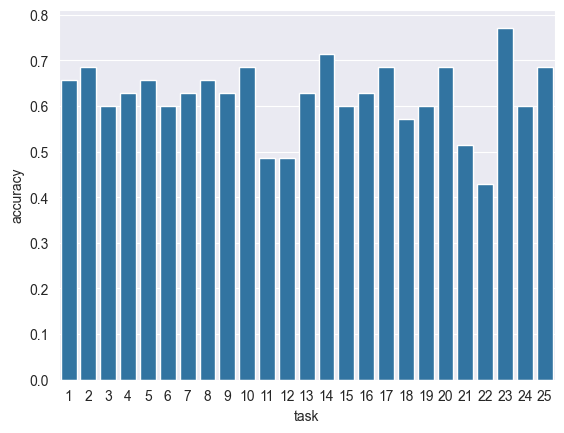

In [72]:
sns.barplot(x='task', y='accuracy', data=models_df)
plt.show()